In[1]:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as sp
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
get_ipython().run_line_magic('matplotlib', 'inline')
from PIL import Image

In[2]:

In [2]:
df = pd.read_csv("Dataset_1.csv")

In[3]:

In [3]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26526,Visakhapatnam,2020-06-22,33.17,108.22,5.58,42.45,27.06,13.70,0.73,13.65,34.85,3.99,10.24,2.32,95.0
26527,Visakhapatnam,2020-06-25,13.45,58.54,2.30,21.60,13.09,12.27,0.41,8.19,29.38,1.28,5.64,0.92,77.0
26528,Visakhapatnam,2020-06-26,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
26529,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0


In[4]:

In [4]:
df.isnull().sum()

City           0
Date           0
PM2.5       4598
PM10       11140
NO          3582
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
O3          4022
Benzene     5623
Toluene     8041
Xylene     18109
AQI         4681
dtype: int64

In[5]:

In [5]:
df.shape

(26531, 15)

In[6]:

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df.iloc[:,2:14]=imputer.fit_transform(df.iloc[:,2:14])

In[7]:

In [9]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI        4681
dtype: int64

In[8]:

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['City']=label_encoder.fit_transform(df['City'])

In[9]:

In [14]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0,2015-01-01,68.355228,117.301377,0.92,18.22,17.15,24.054523,0.92,27.64,133.36,0.000000,0.020000,0.000000,NaN
1,0,2015-01-02,68.355228,117.301377,0.97,15.69,16.46,24.054523,0.97,24.55,34.06,3.680000,5.500000,3.770000,NaN
2,0,2015-01-03,68.355228,117.301377,17.40,19.30,29.70,24.054523,17.40,29.07,30.70,6.800000,16.400000,2.250000,NaN
3,0,2015-01-04,68.355228,117.301377,1.70,18.48,17.97,24.054523,1.70,18.59,36.08,4.430000,10.140000,1.000000,NaN
4,0,2015-01-05,68.355228,117.301377,22.10,21.42,37.76,24.054523,22.10,39.33,39.31,7.010000,18.890000,2.780000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26526,25,2020-06-22,33.170000,108.220000,5.58,42.45,27.06,13.700000,0.73,13.65,34.85,3.990000,10.240000,2.320000,95.0
26527,25,2020-06-25,13.450000,58.540000,2.30,21.60,13.09,12.270000,0.41,8.19,29.38,1.280000,5.640000,0.920000,77.0
26528,25,2020-06-26,7.630000,32.270000,5.91,23.27,17.19,11.150000,0.46,6.87,19.90,1.450000,5.370000,1.450000,47.0
26529,25,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0


In[10]:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26531 entries, 0 to 26530
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     26531 non-null  int64  
 1   Date     26531 non-null  object 
 2   PM2.5    26531 non-null  float64
 3   PM10     26531 non-null  float64
 4   NO       26531 non-null  float64
 5   NO2      26531 non-null  float64
 6   NOx      26531 non-null  float64
 7   NH3      26531 non-null  float64
 8   CO       26531 non-null  float64
 9   SO2      26531 non-null  float64
 10  O3       26531 non-null  float64
 11  Benzene  26531 non-null  float64
 12  Toluene  26531 non-null  float64
 13  Xylene   26531 non-null  float64
 14  AQI      21850 non-null  float64
dtypes: float64(13), int64(1), object(1)
memory usage: 3.0+ MB


In [16]:
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26531 entries, 0 to 26530
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   City     26531 non-null  int64         
 1   Date     26531 non-null  datetime64[ns]
 2   PM2.5    26531 non-null  float64       
 3   PM10     26531 non-null  float64       
 4   NO       26531 non-null  float64       
 5   NO2      26531 non-null  float64       
 6   NOx      26531 non-null  float64       
 7   NH3      26531 non-null  float64       
 8   CO       26531 non-null  float64       
 9   SO2      26531 non-null  float64       
 10  O3       26531 non-null  float64       
 11  Benzene  26531 non-null  float64       
 12  Toluene  26531 non-null  float64       
 13  Xylene   26531 non-null  float64       
 14  AQI      21850 non-null  float64       
dtypes: datetime64[ns](1), float64(13), int64(1)
memory usage: 3.0 MB


In[11]:

In [19]:
df = df[~df['AQI'].isna()]

In[12]:

In [20]:
df = df.drop(['Date'],axis = 1)

In[13]:

In [21]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,0,83.13,117.301377,6.93,28.71,33.72,24.054523,6.93,49.52,59.76,0.020000,0.000000,3.140000,209.0
29,0,79.84,117.301377,13.85,28.68,41.08,24.054523,13.85,48.49,97.07,0.040000,0.000000,4.810000,328.0
30,0,94.52,117.301377,24.39,32.66,52.61,24.054523,24.39,67.39,111.33,0.240000,0.010000,7.670000,514.0
31,0,135.99,117.301377,43.48,42.08,84.57,24.054523,43.48,75.23,102.70,0.400000,0.040000,25.870000,782.0
32,0,178.33,117.301377,54.56,35.31,72.80,24.054523,54.56,55.04,107.38,0.460000,0.060000,35.610000,914.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26526,25,33.17,108.220000,5.58,42.45,27.06,13.700000,0.73,13.65,34.85,3.990000,10.240000,2.320000,95.0
26527,25,13.45,58.540000,2.30,21.60,13.09,12.270000,0.41,8.19,29.38,1.280000,5.640000,0.920000,77.0
26528,25,7.63,32.270000,5.91,23.27,17.19,11.150000,0.46,6.87,19.90,1.450000,5.370000,1.450000,47.0
26529,25,24.38,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0


In[14]:

<Axes: xlabel='City', ylabel='AQI'>

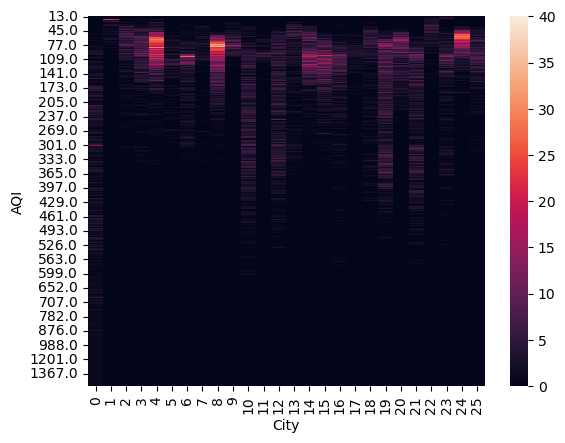

In [22]:
sns.heatmap(pd.crosstab(df['AQI'],df['City']))

In [23]:
df.corr()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
City,1.000000,0.107741,-0.004419,0.073865,-0.105474,0.025173,-0.190131,-0.287528,-0.125007,0.018030,0.021445,-0.036165,-0.012506,-0.126420
PM2.5,0.107741,1.000000,0.527352,0.441391,0.347856,0.400212,0.164718,0.085383,0.124965,0.150070,0.013789,0.087406,0.069087,0.636046
PM10,-0.004419,0.527352,1.000000,0.436889,0.352100,0.427064,0.195421,0.042280,0.187502,0.199489,0.006805,0.089364,0.017727,0.467059
NO,0.073865,0.441391,0.436889,1.000000,0.475732,0.779191,0.132440,0.221789,0.189025,0.015239,0.026097,0.110609,0.049693,0.439807
NO2,-0.105474,0.347856,0.352100,0.475732,1.000000,0.607870,0.154109,0.383160,0.425787,0.293147,0.020431,0.243581,0.138570,0.538148
NOx,0.025173,0.400212,0.427064,0.779191,0.607870,1.000000,0.106695,0.254816,0.248526,0.093155,0.027883,0.153331,0.047217,0.463079
NH3,-0.190131,0.164718,0.195421,0.132440,0.154109,0.106695,1.000000,0.010532,-0.025944,0.074574,-0.015745,-0.011946,-0.004857,0.112446
CO,-0.287528,0.085383,0.042280,0.221789,0.383160,0.254816,0.010532,1.000000,0.498253,0.042230,0.047567,0.279358,0.136820,0.689041
SO2,-0.125007,0.124965,0.187502,0.189025,0.425787,0.248526,-0.025944,0.498253,1.000000,0.165660,0.037548,0.292317,0.230369,0.492535
O3,0.018030,0.150070,0.199489,0.015239,0.293147,0.093155,0.074574,0.042230,0.165660,1.000000,0.019239,0.118980,0.084284,0.186974


In[15]:

<Axes: xlabel='City', ylabel='AQI'>

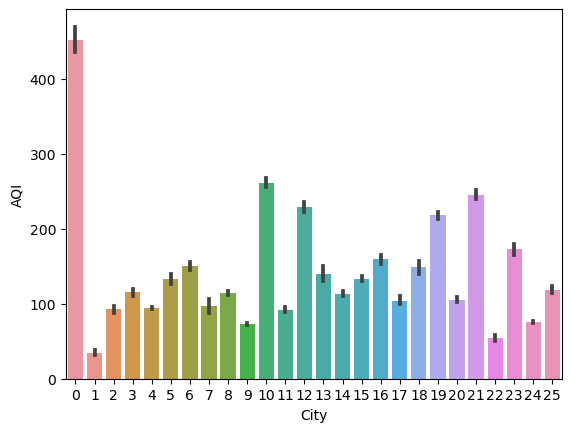

In [26]:
sns.barplot(x='City',y='AQI',data=df)

In [27]:
df = df.drop(['Benzene'],axis = "columns")

In[16]:

In [28]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Toluene,Xylene,AQI
28,0,83.13,117.301377,6.93,28.71,33.72,24.054523,6.93,49.52,59.76,0.000000,3.140000,209.0
29,0,79.84,117.301377,13.85,28.68,41.08,24.054523,13.85,48.49,97.07,0.000000,4.810000,328.0
30,0,94.52,117.301377,24.39,32.66,52.61,24.054523,24.39,67.39,111.33,0.010000,7.670000,514.0
31,0,135.99,117.301377,43.48,42.08,84.57,24.054523,43.48,75.23,102.70,0.040000,25.870000,782.0
32,0,178.33,117.301377,54.56,35.31,72.80,24.054523,54.56,55.04,107.38,0.060000,35.610000,914.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26526,25,33.17,108.220000,5.58,42.45,27.06,13.700000,0.73,13.65,34.85,10.240000,2.320000,95.0
26527,25,13.45,58.540000,2.30,21.60,13.09,12.270000,0.41,8.19,29.38,5.640000,0.920000,77.0
26528,25,7.63,32.270000,5.91,23.27,17.19,11.150000,0.46,6.87,19.90,5.370000,1.450000,47.0
26529,25,24.38,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,2.210000,0.380000,70.0


In[17]:

In [29]:
scaler = StandardScaler()

In[18]:

In[19]:

In[20]:

In [30]:
x = df.drop(['AQI'],axis = "columns")
y = df['AQI']

In[21]:

In [31]:
x

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Toluene,Xylene
28,0,83.13,117.301377,6.93,28.71,33.72,24.054523,6.93,49.52,59.76,0.000000,3.140000
29,0,79.84,117.301377,13.85,28.68,41.08,24.054523,13.85,48.49,97.07,0.000000,4.810000
30,0,94.52,117.301377,24.39,32.66,52.61,24.054523,24.39,67.39,111.33,0.010000,7.670000
31,0,135.99,117.301377,43.48,42.08,84.57,24.054523,43.48,75.23,102.70,0.040000,25.870000
32,0,178.33,117.301377,54.56,35.31,72.80,24.054523,54.56,55.04,107.38,0.060000,35.610000
...,...,...,...,...,...,...,...,...,...,...,...,...
26526,25,33.17,108.220000,5.58,42.45,27.06,13.700000,0.73,13.65,34.85,10.240000,2.320000
26527,25,13.45,58.540000,2.30,21.60,13.09,12.270000,0.41,8.19,29.38,5.640000,0.920000
26528,25,7.63,32.270000,5.91,23.27,17.19,11.150000,0.46,6.87,19.90,5.370000,1.450000
26529,25,24.38,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,2.210000,0.380000


In[22]:

In [32]:
y

28       209.0
29       328.0
30       514.0
31       782.0
32       914.0
         ...  
26526     95.0
26527     77.0
26528     47.0
26529     70.0
26530     50.0
Name: AQI, Length: 21850, dtype: float64

In[23]:

In [33]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.2, random_state = 42)

In[24]:

In [34]:
xtrain=scaler.fit_transform(xtrain)

In[25]:

In [35]:
xtest=scaler.transform(xtest)

In[36]:

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In[37]:

In [50]:
svr = SVR(kernel='linear')
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LinearRegression()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [54]:
clfs = {
    'SVR' : svr,
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [56]:
from sklearn.metrics import mean_squared_error 

In [57]:
def train_classifier(clf,xtrain,ytrain,xtest,ytest):
    clf.fit(xtrain,ytrain)
    y_pred = clf.predict(xtest)
    mse=mean_squared_error(y_pred,ytest)
    rmse=np.sqrt(mse)
    return rmse

In [58]:
accuracy_scores = []
for name,clf in clfs.items():
    
    current_rmse = train_classifier(clf, xtrain,ytrain,xtest,ytest)
    
    print("For ",name)
    print("RMSE - ",current_rmse)
    
    accuracy_scores.append(current_rmse)

For  SVR
RMSE -  60.30313754502757
For  DT
RMSE -  97.59347218106844
For  LR
RMSE -  58.48479720048685
For  RF
RMSE -  56.22846091556871
For  AdaBoost
RMSE -  144.63066036501436
For  BgC
RMSE -  58.85322277211007
For  ETC
RMSE -  58.61488162426063


KeyboardInterrupt: 

In [69]:
    clf=rfc
    clf.fit(xtrain,ytrain)
    y_pred = clf.predict(xtest)
    mse=mean_squared_error(y_pred,ytest)
    rmse=np.sqrt(mse)

In [60]:
df2  = pd.read_csv("Dataset_2.csv")

In [61]:
df2.isnull().sum()

City       0
Date       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df2['City']=label_encoder.fit_transform(df2['City'])

In [66]:
df2[['City','PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Toluene','Xylene']] = scaler.transform(df2[['City','PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Toluene','Xylene']])
df2

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,-1.020216,2018-02-19,-0.349737,-0.065282,-0.598672,0.618878,-0.185185,-0.167713,-0.239910,-0.408894,0.852317,1.28,-0.138787,-0.414392,111
1,-1.562057,2019-05-17,-0.473575,-0.277532,0.125463,-0.544400,0.077625,-0.545069,-0.245261,0.068358,-1.051516,4.09,-0.374319,1.406987,99
2,-0.884755,2019-10-26,-0.551541,-0.724553,-0.331533,-0.091417,0.143497,-0.595501,-0.254625,-0.444509,-0.937799,19.16,1.310355,-0.296580,54
3,-0.749295,2020-02-10,0.445583,0.807318,2.066022,1.008626,2.814502,0.298563,-0.160987,-0.288348,-0.961568,2.37,0.015731,0.089845,226
4,-1.562057,2018-03-06,-0.325000,-0.426270,-0.305176,-0.944090,-0.322671,-0.760069,-0.258638,-0.657109,-0.436790,8.82,-0.211217,0.047432,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-1.020216,2019-01-24,-0.146210,-0.065686,-0.604926,0.454627,-0.296322,-0.249997,-0.265327,-0.514097,-0.247106,1.58,-0.088890,-0.605248,112
2996,-1.426597,2019-09-20,-0.440698,-0.667243,-0.315004,-0.979883,-0.654731,-0.906057,-0.269340,-0.267526,-0.285789,4.46,-0.385049,-0.470942,71
2997,-0.613834,2017-02-10,0.338027,0.554613,-0.286861,0.856306,0.120188,-0.507908,-0.215832,-0.214376,-0.082589,0.00,-0.493427,-0.819667,228
2998,-1.697518,2019-12-04,0.141076,-0.039661,-0.648258,-0.548377,-0.733439,-0.156211,-0.231884,0.007538,1.012174,0.36,-0.402755,-0.793748,156


In [71]:
x_test = df2.drop(['AQI','Date','Benzene'],axis = "columns")

In [72]:
y_test = df2['AQI']

In [73]:
y_pred = clf.predict(x_test)

C:\Users\soumy\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [74]:
y_pred

array([111.,  94.,  68., ..., 185., 138., 432.])

In [75]:
y_test

0       111
1        99
2        54
3       226
4        73
       ... 
2995    112
2996     71
2997    228
2998    156
2999    376
Name: AQI, Length: 3000, dtype: int64

In[28]:

In [76]:
from sklearn.metrics import mean_squared_error

In [77]:
mse = mean_squared_error(y_test,y_pred)

In [78]:
rmse = np.sqrt(mse)

In [79]:
rmse

33.69096318005764